<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/CG3final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOPIC, BACKGROUND AND CONTEXT

TOPIC - CORPORATE GOVERNANCE AND FIRM PERFORMANCE

growing discourse and research that environmental, social and governance (ESG) factors can influence long-term firm performance - as evidenced by the rapid growth of ESG investment funds (ESG integration in the investment process) - belief that ESG can be 'value-enhancing' (thereby satisfying fiduciary duty) and not just 'values-enhancing'.

data - firm level data - corporate governance and firm performance data for listed firms on six stock exchanges in six Asian economies over eight years. 5008 observations, 13 governance attributes, 6 financial performance indicators

reference for data -
*Corporate governance data of 6 Asian economies (2010–2017)*,
Raja R.R. Singareddy, Shabana Chandrasekaran, Balamurugan Annamalai, Pratyush Ranjan.
Elsevier, 2018.
https://www.sciencedirect.com/science/article/pii/S2352340918308242


**Research questions**

main question - does corporate governace help explain firm performance

that is - whether corporate governance score can help predict firm performance classification as an above or below median financial performer

other questions
-what is the trend in corporate governance (CG) over time
-what is the trend in financial performance (FP) over time
-is there any correlation between CG and FP
-which countries have strong/weak governance, performance
-where is the correlation strongest between CG and FP by country
-are there any CG attributes that appear to correlate strongest (vis-a-vis other CG attributes) with FP



# LIBRARIES

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# READ AND UNDERSTAND THE DATA

In [311]:
df = pd.read_csv('https://raw.githubusercontent.com/mili-b/PredictiveAnalytics/main/CG%20data%20for%206%20asian%20economies%202010-17%20csv.csv')


In [312]:
# rows-5008, and columns-24
df.shape

(5008, 24)

In [313]:
# view data
df.head()

,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,...,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
0,600000 CH,600000 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,14.60,0.00,0.13,0.18,0.00,NaN
1,600008 CH,600008 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,6.0,9.73,-0.05,0.12,0.31,0.28,0.0
2,600009 CH,600009 CH Equity,China,2010,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,9.77,-0.03,0.08,0.14,0.77,0.0
3,600010 CH,600010 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,10.65,-0.05,0.05,0.39,0.49,0.0
4,600015 CH,600015 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,5.0,13.85,0.00,0.14,0.21,0.01,NaN


In [314]:
# data for 8 years 2010-2017. equally distributed over years
df['Year'].value_counts()

2010    626
2011    626
2012    626
2013    626
2014    626
2015    626
2016    626
2017    626
Name: Year, dtype: int64

In [315]:
# data for 6 asian countries and distribution - most from China, least from Indonesia
df['Country'].value_counts()

China          1440
India           808
Japan           800
South Korea     800
Thailand        800
Indonesia       360
Name: Country, dtype: int64

In [316]:
# data types. some null values since some count less than data size of 5008
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ticker_Id                                          5008 non-null   object 
 1   Indx_Members                                       5008 non-null   object 
 2   Country                                            5008 non-null   object 
 3   Year                                               5008 non-null   int64  
 4   Board size                                         4864 non-null   float64
 5   Board independence                                 4864 non-null   float64
 6   CEO duality                                        4864 non-null   float64
 7   Board meeting attendance                           4864 non-null   float64
 8   Independence of audit committee                    4864 non-null   float64
 9   Auditor 

NOTE - IN GENERAL, THE AUTHORS CODED CORPORATE GOVERNANCE VARIABLES AS (0,1) USING WIDELY ACCEPTED MINIMAL CORPORATE GOVERNANCE STANDARDS IN THE INDUSTRY - EXAMPLE - BOARD MEETING  ATTENDANCE OF 66.6% IS CONSIDERED MINIMALLY ACCEPTABLE STANDARD IN THE INDUSTRY. OTHERS WERE YES/NO. ACCEPTABLE MINIMUM AND ABOVE CODED AS 1 AND BELOW CODED AS 0.

**Board size** Count Number of directors on the board Value greater than or equal to 5 is 1; 0 otherwise

**Board independence** Percentage A board which has a majority of independent directors who are not affiliated with the firm Value greater than or equal to 50% is 1; 0 otherwise

**CEO duality** Binary (Yes/No) A situation where the CEO also holds the position of chairman of the board
No is 1; 0 otherwise

**Board meeting attendance** Percentage Attendance by the directors of the board for the board meeting
Value greater than or equal to 66.67% (2/3) is 1; 0 otherwise

**Independence of audit committee** Percentage A committee with a majority of non-executive
directors that connects board of directors and
external auditors (Percentage of independent
directors on audit committee).
Value greater than or equal to 50% is 1; 0 otherwise

**Auditor ratification** Binary (Yes/No) A firm appoints an auditor with annual ratification by
the shareholders during the annual general meeting
Yes is 1; 0 otherwise

**Independence of compensation committee** Count A committee with a majority of non-executive directors to oversee the executive compensation Value greater than or equal to 3 is 1; 0 otherwise

**Independence of nomination committee**
Percentage A committee which examines board of directors of the firm and evaluates skills needed for directors Value greater than or equal to 50% is 1; 0 otherwise

**Shareholder approved poison pill** Binary (Yes/No) In the event of a hostile takeover, shareholders are
provided with exclusive rights to cancel the deal
Yes is 1; 0 otherwise

**Dual class unequal voting rights of common shares**
Binary (Yes/No) This provision limits voting rights of some equity holders while expanding those of others
No is 1; 0 otherwise

**Staggered board** Binary (Yes/No) A board in which replacement of directors is delayed due to overlapping terms and classes No is 1; 0 otherwise

**Diversity of board** Percentage Women representation in the board of directors Value greater than or equal to 1 is 1; 0 otherwise

**Board duration** Count Duration of director's continuation in the board Value less than 9 is 1; 0 otherwise

**Corporate governance** score Continuous Sum (aggregated) of the binarised corporate

**LogAsset** Real-valued numeric Natural logarithm of an asset is approximately equal to the rate of return of an asset

**CAPEXByAsset** Real-valued ratio The ratio of CAPEX to Assets

**CashByAsset** Real-valued ratio The ratio of Cash to Assets

**DebtByAsset** Real-valued ratio The ratio of Debt to assets is an indicator of financial leverage.

**PPNEByAssets** Real-valued ratio The ratio of PPNE to Assets

**RNDBYAssets** Real-valued ratio The ratio of Research and Development expenditure to Assets


# MISSING DATA

In [317]:
df.isnull().sum()

Ticker_Id                                               0
Indx_Members                                            0
Country                                                 0
Year                                                    0
Board size                                            144
Board independence                                    144
CEO duality                                           144
Board meeting attendance                              144
Independence of audit committee                       144
Auditor ratification                                  144
Independence of compensation committee                144
Independence of nomination committee                  144
Shareholder approved poison pill                      144
Dual class unequal voting rights of common shares     144
Staggered board                                       144
Diversity of board                                    144
Board duration                                        144
Corporate gove

In [318]:
# the governance features columns (categorical) appear to all have 144 missing values - drop these

df= df.dropna(subset=['Corporate governance score'])    # drop from one column should drop from all
df.isnull().sum()

Ticker_Id                                               0
Indx_Members                                            0
Country                                                 0
Year                                                    0
Board size                                              0
Board independence                                      0
CEO duality                                             0
Board meeting attendance                                0
Independence of audit committee                         0
Auditor ratification                                    0
Independence of compensation committee                  0
Independence of nomination committee                    0
Shareholder approved poison pill                        0
Dual class unequal voting rights of common shares       0
Staggered board                                         0
Diversity of board                                      0
Board duration                                          0
Corporate gove

In [319]:
# the financial measures still have some missing data - fill with column medians

df = df.fillna(df.median())
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Ticker_Id                                            0
Indx_Members                                         0
Country                                              0
Year                                                 0
Board size                                           0
Board independence                                   0
CEO duality                                          0
Board meeting attendance                             0
Independence of audit committee                      0
Auditor ratification                                 0
Independence of compensation committee               0
Independence of nomination committee                 0
Shareholder approved poison pill                     0
Dual class unequal voting rights of common shares    0
Staggered board                                      0
Diversity of board                                   0
Board duration                                       0
Corporate governance score                           0
LogAsset  

In [320]:
df.columns


Index(['Ticker_Id', 'Indx_Members', 'Country', 'Year', 'Board size',
       'Board independence', 'CEO duality', 'Board meeting attendance',
       'Independence of audit committee', 'Auditor ratification',
       'Independence of compensation committee',
       'Independence of nomination committee',
       'Shareholder approved poison pill',
       'Dual class unequal voting rights of common shares', 'Staggered board',
       'Diversity of board', 'Board duration', 'Corporate governance score',
       'LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset'],
      dtype='object')

# EDA 

### Outliers and scatter plots
note- there are outliers in the financial data, but chose not to correct for the outliers because the finanical variables will be coded as (0,1)s based on the column medians - median not sublject to extreme values

In [321]:
# describe the data
df[['LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset']].describe()
#df.describe()

,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,13.173279,-0.027845,0.108164,0.247202,0.278168,0.009509
std,2.894976,0.063931,0.106641,0.185592,0.222691,0.025537
min,4.680000,-0.660000,0.000000,0.000000,0.000000,0.000000
25%,10.910000,-0.060000,0.040000,0.100000,0.087500,0.000000
50%,13.300000,-0.020000,0.080000,0.230000,0.250000,0.000000
75%,15.330000,0.000000,0.140000,0.360000,0.430000,0.010000
max,20.840000,0.360000,0.890000,3.230000,0.920000,0.450000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d9cb5bfd0>,
      dtype=object)

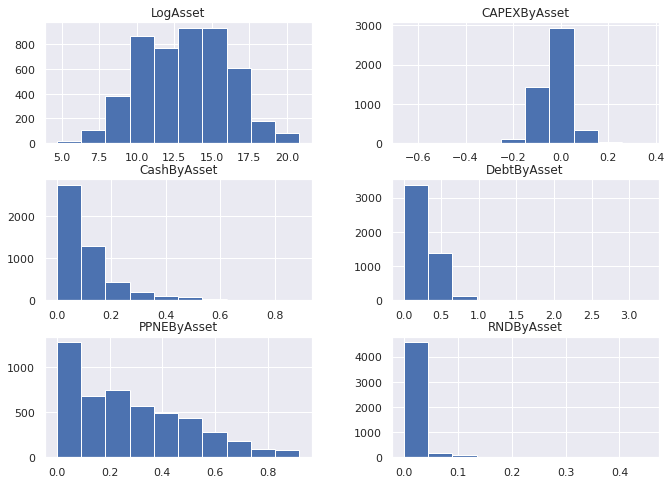

In [322]:
#Histograms
df[['LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset']].hist(figsize=(11,8))

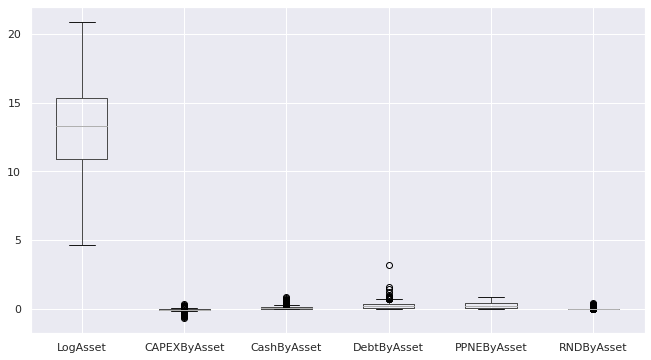

In [323]:
 # boxplot of each continuous/financial variable
# 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'RNDByAsset' have outliers

 
 plt.figure(figsize=(11,6))
 boxplot = df.boxplot(column=['LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset', 'RNDByAsset'])


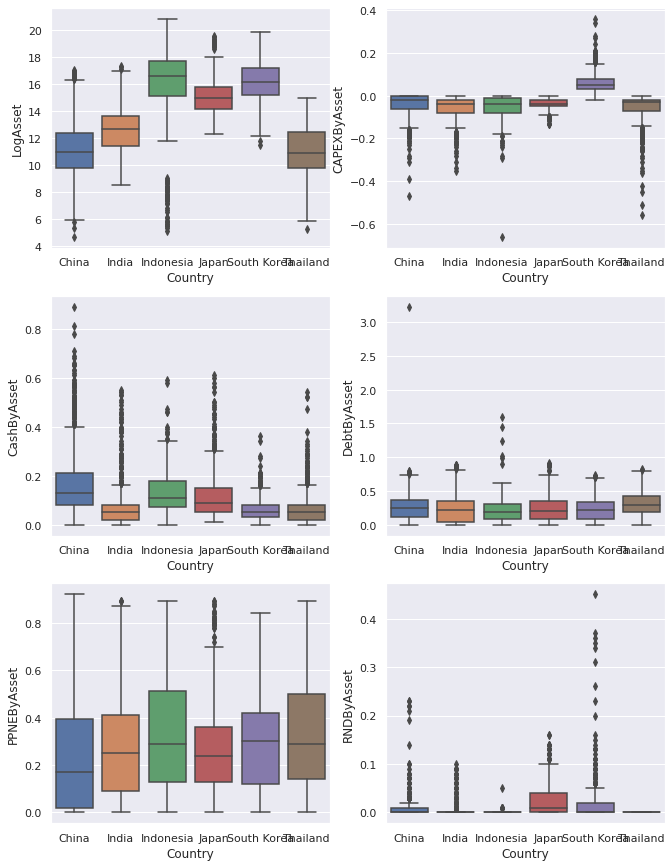

In [324]:
# boxplot by country
# high variablity by country, and outliers

#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(3, 2, figsize=(11,15))

#create chart in each subplot
sns.boxplot(data=df, x='Country', y='LogAsset', ax=axes[0,0])
sns.boxplot(data=df, x='Country', y='CAPEXByAsset', ax=axes[0,1])
sns.boxplot(data=df, x='Country', y='CashByAsset', ax=axes[1,0])
sns.boxplot(data=df, x='Country', y='DebtByAsset', ax=axes[1,1])
sns.boxplot(data=df, x='Country', y='PPNEByAsset', ax=axes[2,0])
sns.boxplot(data=df, x='Country', y='RNDByAsset', ax=axes[2,1])

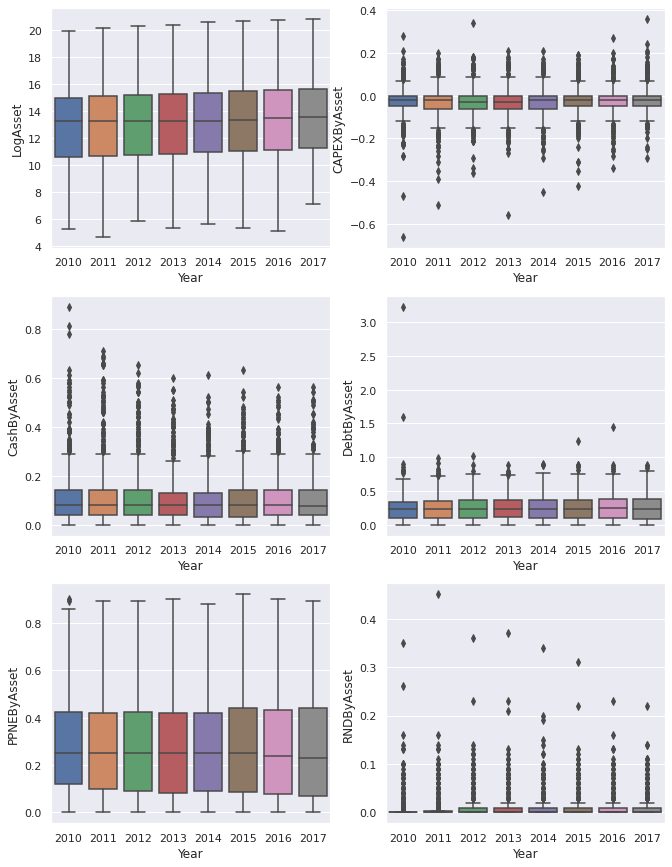

In [325]:
# boxplot by year
# less variability by year, but outliers

#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(3, 2, figsize=(11,15))

#create chart in each subplot
sns.boxplot(data=df, x='Year', y='LogAsset', ax=axes[0,0])
sns.boxplot(data=df, x='Year', y='CAPEXByAsset', ax=axes[0,1])
sns.boxplot(data=df, x='Year', y='CashByAsset', ax=axes[1,0])
sns.boxplot(data=df, x='Year', y='DebtByAsset', ax=axes[1,1])
sns.boxplot(data=df, x='Year', y='PPNEByAsset', ax=axes[2,0])
sns.boxplot(data=df, x='Year', y='RNDByAsset', ax=axes[2,1])

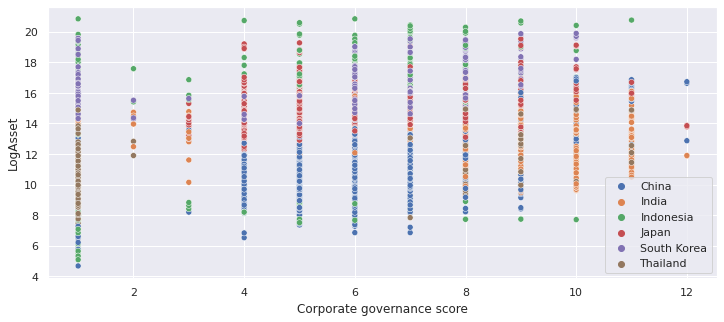

In [326]:
# SCATTER - LOGASSET AND CORPORATE GOVERNANCE SCORE
# No or Possible slight upward trend. If CG mattered, would expect LogAsset scores to be
# higher for firms with the higher CG scores - not necessaily so on diagram
# Indian and Japanese companies dominate higher CG scores
# Thai and South Korean firms dominate the lower CG scores
# Indonesian and South Korean firms appear to be high and low performers 
#   in return on assets across all CG scores
# Chinese firms do not do well on return on assets

sns.set(rc={"figure.figsize":(12, 5)}) #width=10, height=6
sns.scatterplot(data=df, x='Corporate governance score', y='LogAsset', hue='Country')
plt.legend(loc='lower right')

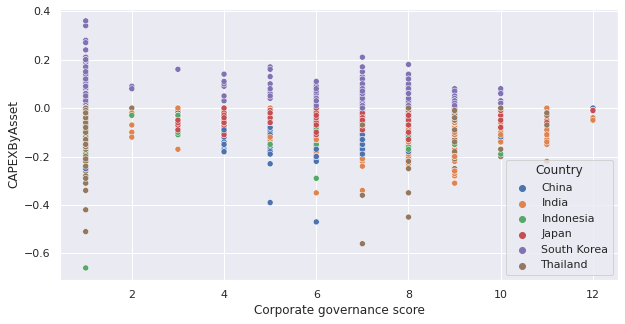

In [327]:
# SCATTER - CAPEXBYASSET AND CORPORATE GOVERNANCE SCORE
# no detectable trend
#Soth Korean firms outperform on all CG scores

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=6
sns.scatterplot(data=df, x='Corporate governance score', y='CAPEXByAsset', hue='Country')

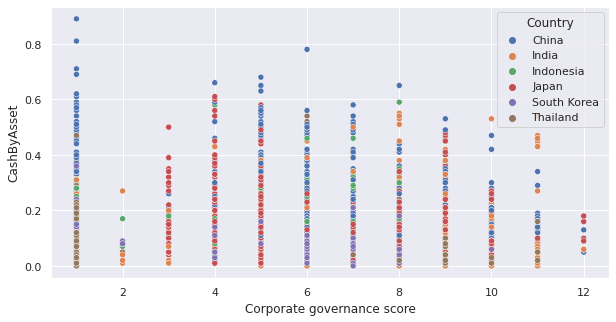

In [328]:
# SCATTER - CASHBYASSET AND CORPORATE GOVERNANCE SCORE
# no detectabel trend
# Chines firms appear to do best across CG scores

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=6
sns.scatterplot(data=df, x='Corporate governance score', y='CashByAsset', hue='Country')

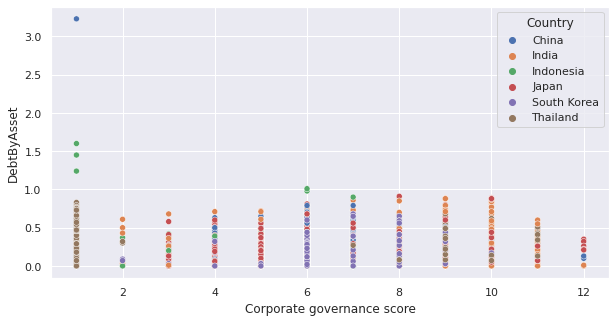

In [329]:
# SCATTER - DEBTBYASSET AND CORPORATE GOVERNANCE SCORE
# no detectabel trend


sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=6
sns.scatterplot(data=df, x='Corporate governance score', y='DebtByAsset', hue='Country')

In [330]:
df.shape

(4864, 24)

In [331]:
df['Country'].value_counts()/len(df)

China          0.266447
India          0.166118
Japan          0.164474
South Korea    0.164474
Thailand       0.164474
Indonesia      0.074013
Name: Country, dtype: float64

In [332]:
# DISTRIBUTION OF CG SCORES BY COUNTRY - PROPORTIONS OF TOTAL

dfCGcountry = df.groupby(['Corporate governance score', 'Country'])['Country'].count()/len(df)
dfCGcountry

Corporate governance score  Country    
1.0                         China          0.051398
                            India          0.016653
                            Indonesia      0.023849
                            Japan          0.001850
                            South Korea    0.116160
                                             ...   
11.0                        Japan          0.001645
                            Thailand       0.002467
12.0                        China          0.000617
                            India          0.000411
                            Japan          0.001234
Name: Country, Length: 65, dtype: float64

<Figure size 864x576 with 0 Axes>

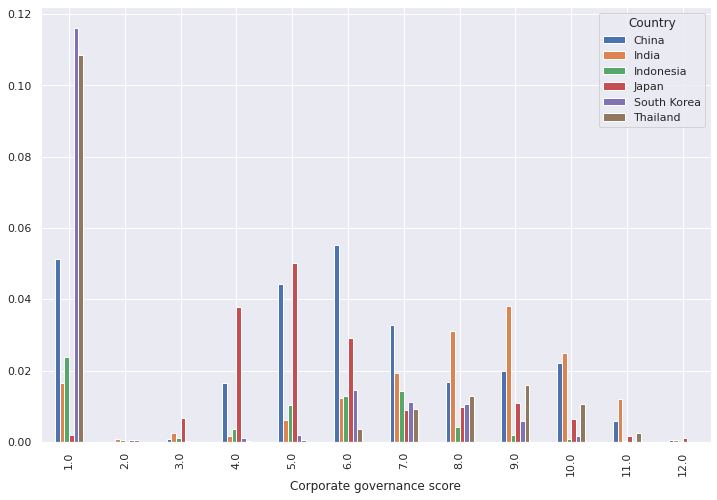

In [333]:
# DISTRIBUTION OF CG SCORES BY COUNTRY - PROPORTIONS OF TOTAL
# confirms much of what observed in scatter plots
# South Korean and Thai firms dominate lower CG scores - considered poorly governed. 
# Indian firms more prominent in higher CG scores - considered better governed

plt.figure(figsize=(12,8))
dfCGcountry.unstack().plot(kind='bar', figsize=(12,8))

FROM DESCRIBE, BOXPLOTS AND SCATTER:

**corporate governance (CG) attributes** all are 0, 1
corporate goverance score (composite of CG attributes) range from 1-12 
(tho can range from 0-13 i.e 13 attributes).

**Boxplots** - show variablility by country and also extreme values. show stability across years but some extreme values.  not correct for outliers since performance data will be coded as (0,1)s based on medians - not subject to extreme values


**Scatter** - not show much relation between CG scores and performance indicators

In [334]:
df.columns

Index(['Ticker_Id', 'Indx_Members', 'Country', 'Year', 'Board size',
       'Board independence', 'CEO duality', 'Board meeting attendance',
       'Independence of audit committee', 'Auditor ratification',
       'Independence of compensation committee',
       'Independence of nomination committee',
       'Shareholder approved poison pill',
       'Dual class unequal voting rights of common shares', 'Staggered board',
       'Diversity of board', 'Board duration', 'Corporate governance score',
       'LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset'],
      dtype='object')

In [335]:
# correlations
df.corr()

,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,...,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
Year,1.000000,0.014527,0.162619,0.008793,0.030915,0.041455,0.117670,0.064225,0.227770,-0.024436,...,0.029258,0.120992,0.024817,0.122168,0.078651,0.056609,-0.046395,0.012733,-0.020835,0.014882
Board size,0.014527,1.000000,-0.067132,-0.066252,-0.011865,0.062625,0.031156,0.042855,0.045747,-0.034874,...,-0.024122,-0.003706,-0.030292,0.007295,-0.082236,0.026100,-0.001462,0.031060,-0.028473,0.031780
Board independence,0.162619,-0.067132,1.000000,0.463574,0.634512,0.662629,0.319694,0.388639,0.504477,-0.061666,...,-0.015468,0.390931,0.374171,0.739149,0.087192,-0.093999,-0.060679,-0.023404,-0.038298,-0.040088
CEO duality,0.008793,-0.066252,0.463574,1.000000,0.602281,0.361175,0.200272,0.245337,0.291788,0.037900,...,0.423222,0.457726,0.424204,0.699281,-0.005033,-0.219841,0.058536,0.028511,-0.022160,-0.033834
Board meeting attendance,0.030915,-0.011865,0.634512,0.602281,1.000000,0.552043,0.321233,0.357773,0.361271,-0.101436,...,0.227156,0.482259,0.338759,0.728209,-0.194427,-0.260318,0.100361,0.010618,-0.039587,-0.101316
Independence of audit committee,0.041455,0.062625,0.662629,0.361175,0.552043,1.000000,0.386553,0.576762,0.718749,-0.043437,...,-0.128083,0.356008,0.398836,0.758888,0.049078,-0.090597,-0.088696,0.007976,-0.031331,-0.055932
Auditor ratification,0.117670,0.031156,0.319694,0.200272,0.321233,0.386553,1.000000,0.263676,0.353504,-0.044017,...,-0.000493,0.223600,0.137029,0.431329,-0.014363,-0.108766,-0.050828,-0.002877,0.037745,-0.058307
Independence of compensation committee,0.064225,0.042855,0.388639,0.245337,0.357773,0.576762,0.263676,1.000000,0.579790,0.008643,...,0.025632,0.328578,0.295444,0.608276,0.078012,-0.053848,-0.045258,-0.017983,-0.142167,-0.043392
Independence of nomination committee,0.227770,0.045747,0.504477,0.291788,0.361271,0.718749,0.353504,0.579790,1.000000,-0.006259,...,-0.016361,0.349975,0.377986,0.694021,0.170631,0.027222,-0.099945,0.006489,-0.095284,0.000840
Shareholder approved poison pill,-0.024436,-0.034874,-0.061666,0.037900,-0.101436,-0.043437,-0.044017,0.008643,-0.006259,1.000000,...,0.158377,-0.028723,0.127924,0.072181,0.071736,-0.037477,-0.044691,0.018426,0.063056,0.089736


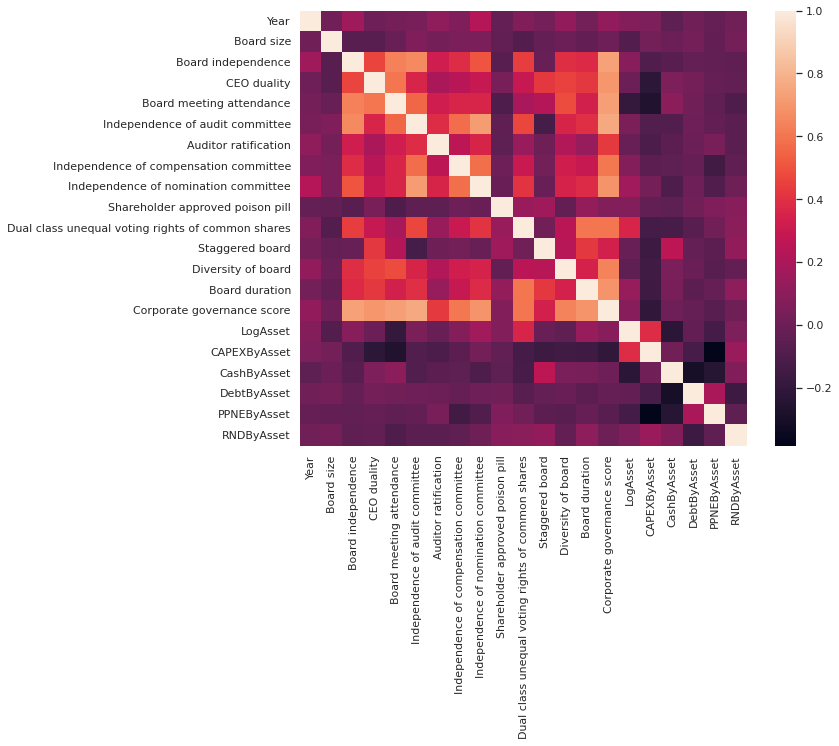

In [336]:
# correlation heatmap
# explanatory variables (CG) more correlated with themselves than with the dependent variables (FP)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

from correlation matrix and heatmap of correlations


*   **financial performance measures** not correlated with each other BUT also not strongly correlated with overall CG score or individual CG attributes (not good - since hypothesis is that CG influences financial performance)
*   **corporate governace attributes** or independent variables are correlated with each other (not good). Expect the overall CG score to be correlated with the individual CG attributes since the overall CG score is a composite of the individual CG scores. More problematic is that many of the individual CG attributes are correlated with each other. this makes sense though - example - highly independent boards are also likely to have highly independent subcommittees (audit, compensation etc). Have to be careful in selecting CG attributes to use as independent/feature variables.



# DATA MANIPULATION AND TRANSFORMATION



1.   INDEPENDENT VARIABLES - use overall corporate governance score as independent variable (along with year and country).  this alleviates the problem of choosing among individual corporate governance atrributes given the correlation among them.
2.   DEPENDENT VARIABLE - the dependent variable is financial performance. There are 6 financial performance indicators. we can develop and overall composite score of the six of them (similar to the approach in developing the composite CG score) and use this composite score as the dependent variable. alternately, we could also fo the analysis for one or each financial measure separately - we will use the composite approach.

**DEVELOPING A COMPOSITE FINANCIAL INDICATOR** using 'LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset', 'RNDByAsset'

**steps**:

(1) calcuate the median of each variable. 

(2) Code values/companies doing better than the median as 1 and values/companies performing at or below median as 0. (except for debt - above mean coded as 0 and below mean coded as 1). This creates 6 new columns for the newly coded data for each variable

(3) create and overall 'Financial performance score' as the sum of the 6 newly created columns. 'Financial performance score' values can range from 0-6

'Financial performance score' = 'LogAsset2' + 'CAPEXByAsset2' + 'CashByAsset2' + 'DebtByAsset2' + 'PPNEByAsset2' + 'PPNEByAsset2'

(4) create 'Financial performance score2' - reduce the 'Financial performance score' to two groups (0,1) from a range of 0-6.  Code values at the median and above as 1, code values below the median as 0.  this reduces the dependent variable to a series of (0,1)










In [337]:
# create a new dataframe df1 to work with

df1 = df

#### step 1

In [338]:
# calculate the median of 'LogAsset'
df1['LogAsset'].median()

13.3

#### step 2

In [339]:
# for 'LogAsset' - code above mean as 1, and at or below mean as 0

# DataFrame.loc[condition, column_name] = new_value
df1.loc[df1['LogAsset'] <= 13.3, 'LogAsset2'] = 0
df1.loc[df1['LogAsset'] > 13.3, 'LogAsset2'] = 1

In [340]:
df1['LogAsset2'].value_counts()

0.0    2528
1.0    2336
Name: LogAsset2, dtype: int64

In [341]:
# do similarly for other financial indicators

df1['CAPEXByAsset'].mean()

-0.027845394736842232

In [342]:
df1['CAPEXByAsset'].median()

-0.02

In [343]:
df1.loc[df1['CAPEXByAsset'] <= -0.02, 'CAPEXByAsset2'] = 0
df1.loc[df1['CAPEXByAsset'] > -0.02, 'CAPEXByAsset2'] = 1

In [344]:
df1['CAPEXByAsset2'].value_counts()

0.0    2937
1.0    1927
Name: CAPEXByAsset2, dtype: int64

In [345]:
df1['CashByAsset'].mean()

0.10816406249999803

In [346]:
df1['CashByAsset'].median()

0.08

In [347]:
df1.loc[df1['CashByAsset'] <= 0.08, 'CashByAsset2'] = 0
df1.loc[df1['CashByAsset'] > 0.08, 'CashByAsset2'] = 1

In [348]:
df1['CashByAsset2'].value_counts()

0.0    2733
1.0    2131
Name: CashByAsset2, dtype: int64

In [349]:
df1['DebtByAsset'].mean()

0.2472018914473675

In [350]:
df1['DebtByAsset'].median()

0.23

In [351]:
df1.loc[df1['DebtByAsset'] > 0.23, 'DebtByAsset2'] = 0
df1.loc[df1['DebtByAsset'] <= 0.23, 'DebtByAsset2'] = 1

In [352]:
df1['DebtByAsset2'].value_counts()

1.0    2576
0.0    2288
Name: DebtByAsset2, dtype: int64

In [353]:
df1['PPNEByAsset'].mean()

0.27816817434210267

In [354]:
df1['PPNEByAsset'].median()

0.25

In [355]:
df1.loc[df1['PPNEByAsset'] <= 0.25, 'PPNEByAsset2'] = 0
df1.loc[df1['PPNEByAsset'] > 0.25, 'PPNEByAsset2'] = 1

In [356]:
df1['PPNEByAsset2'].value_counts()

0.0    2577
1.0    2287
Name: PPNEByAsset2, dtype: int64

In [357]:
df1['RNDByAsset'].mean()

0.009508634868421087

In [358]:
df1['RNDByAsset'].median()

0.0

In [359]:
df1.loc[df1['RNDByAsset'] <= 0.0, 'RNDByAsset2'] = 0
df1.loc[df1['RNDByAsset'] > 0.0, 'RNDByAsset2'] = 1

In [360]:
df1['PPNEByAsset2'].value_counts()

0.0    2577
1.0    2287
Name: PPNEByAsset2, dtype: int64

#### step 3

In [361]:
# calculate overall 'Financial performance score' as sum of individual 
#finanancial indicator score

df1['Financial performance score'] = df1['LogAsset2'] + df1['CAPEXByAsset2'] + df1['CashByAsset2'] + df1['DebtByAsset2'] + df1['PPNEByAsset2'] + df1['PPNEByAsset2']


In [362]:
df1.columns

Index(['Ticker_Id', 'Indx_Members', 'Country', 'Year', 'Board size',
       'Board independence', 'CEO duality', 'Board meeting attendance',
       'Independence of audit committee', 'Auditor ratification',
       'Independence of compensation committee',
       'Independence of nomination committee',
       'Shareholder approved poison pill',
       'Dual class unequal voting rights of common shares', 'Staggered board',
       'Diversity of board', 'Board duration', 'Corporate governance score',
       'LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset', 'LogAsset2', 'CAPEXByAsset2', 'CashByAsset2',
       'DebtByAsset2', 'PPNEByAsset2', 'RNDByAsset2',
       'Financial performance score'],
      dtype='object')

In [363]:
# scores range form 0-6

df1['Financial performance score'].value_counts()

3.0    1539
2.0    1323
4.0     876
1.0     582
5.0     349
0.0     120
6.0      75
Name: Financial performance score, dtype: int64

In [364]:
df1['Financial performance score'].describe()


count    4864.000000
mean        2.784539
std         1.237913
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Financial performance score, dtype: float64

#### step 4

In [365]:
# reduce 'Financial performance score' to two groups (0,1)
# code median (3,4,5,6) and above as 1 ; code below median (0,1,2,) as 0

df1.loc[df1['Financial performance score'] <= 2, 'Financial performance score2'] = 0
df1.loc[df1['Financial performance score'] > 2, 'Financial performance score2'] = 1


In [366]:
df1['Financial performance score2'].value_counts()

1.0    2839
0.0    2025
Name: Financial performance score2, dtype: int64

In [367]:
df1.head(3)

,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,...,PPNEByAsset,RNDByAsset,LogAsset2,CAPEXByAsset2,CashByAsset2,DebtByAsset2,PPNEByAsset2,RNDByAsset2,Financial performance score,Financial performance score2
0,600000 CH,600000 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,0.00,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0
1,600008 CH,600008 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,...,0.28,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0
2,600009 CH,600009 CH Equity,China,2010,1.0,0.0,1.0,1.0,1.0,0.0,...,0.77,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0


In [368]:
df1.columns

Index(['Ticker_Id', 'Indx_Members', 'Country', 'Year', 'Board size',
       'Board independence', 'CEO duality', 'Board meeting attendance',
       'Independence of audit committee', 'Auditor ratification',
       'Independence of compensation committee',
       'Independence of nomination committee',
       'Shareholder approved poison pill',
       'Dual class unequal voting rights of common shares', 'Staggered board',
       'Diversity of board', 'Board duration', 'Corporate governance score',
       'LogAsset', 'CAPEXByAsset', 'CashByAsset', 'DebtByAsset', 'PPNEByAsset',
       'RNDByAsset', 'LogAsset2', 'CAPEXByAsset2', 'CashByAsset2',
       'DebtByAsset2', 'PPNEByAsset2', 'RNDByAsset2',
       'Financial performance score', 'Financial performance score2'],
      dtype='object')

### Trends in corporate governace and financial performance scores

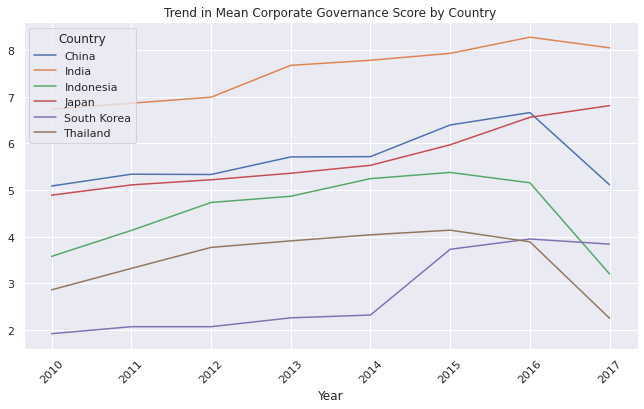

In [369]:
df1trendCG = df1.groupby(['Year', 'Country'])['Corporate governance score'].mean()
df1trendCG

# plot the result

df1trendCG.unstack().plot(figsize=(11,6))
plt.xticks(rotation=45)
plt.title('Trend in Mean Corporate Governance Score by Country')
plt.show()

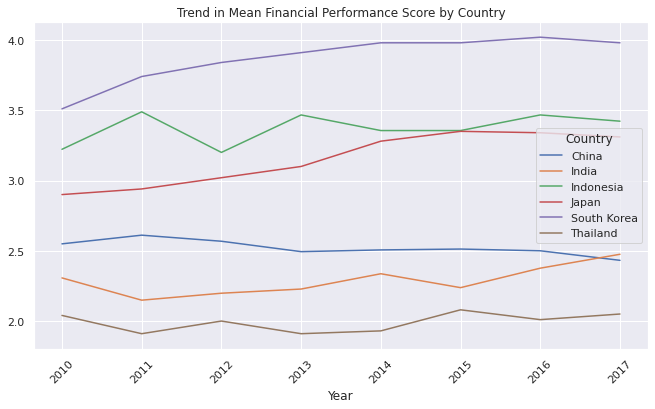

In [370]:
# South Korea is CG underperformer in previous chart, but is an outperformer in financials - below

df1trendFP = df1.groupby(['Year', 'Country'])['Financial performance score'].mean()
df1trendFP

# plot the result

df1trendFP.unstack().plot(figsize=(11,6))
plt.xticks(rotation=45)
plt.title('Trend in Mean Financial Performance Score by Country')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatterplot of Mean Financial Performance Score vs Mean Corporate Governance Score')

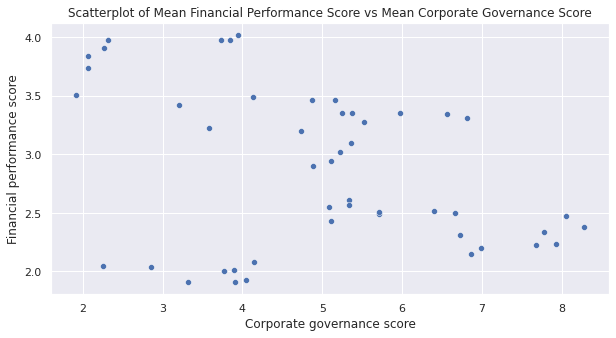

In [371]:
# scatterplot of CG and FP show little correlation

sns.scatterplot(df1trendCG, df1trendFP)
plt.title('Scatterplot of Mean Financial Performance Score vs Mean Corporate Governance Score')

for most countries, mean corporate governance score trended up over the period but fell in 2017

India, China and Japan have the strongest CG scores 

WHILE South Korea had the weakest CG scores over the period, it also has the strongest performance scores over th period

the scatter plot shows weak relationship between the means of the two variables

# NEW DATAFRAME DF2 TO USE IN MODEL BUILDING

In [372]:

df2 = df1.loc[:, ['Financial performance score2', 'Corporate governance score', 
                  'Year', 'Country']]
df2.head(5)


,Financial performance score2,Corporate governance score,Year,Country
0,1.0,5.0,2010,China
1,1.0,6.0,2010,China
2,1.0,7.0,2010,China
3,0.0,5.0,2010,China
4,1.0,5.0,2010,China


## EDA

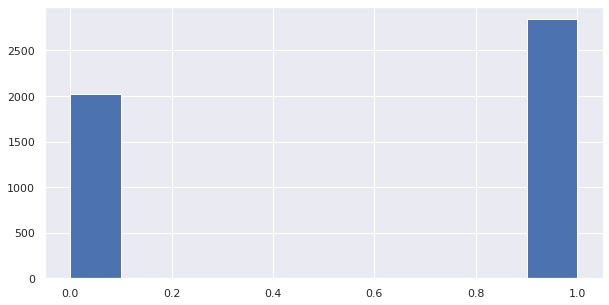

In [373]:
df2['Financial performance score2'].hist()

In [374]:
# financial performance score and corporate governance score are not highly
# correlated. in fact, the sign is negative - not what waht expected
df2.corr()

,Financial performance score2,Corporate governance score,Year
Financial performance score2,1.000000,-0.007444,0.036678
Corporate governance score,-0.007444,1.000000,0.122168
Year,0.036678,0.122168,1.000000


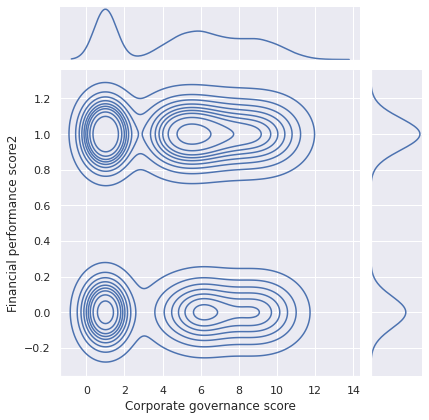

In [375]:
# both low and high financial performance groups appear to be tightly concentrated
# around 0-2 CG scores, then more dispersed around higher CG scores

sns.jointplot(x='Corporate governance score', y='Financial performance score2', 
              data=df2,kind='kde')


### Dummies

In [376]:
# DUMMY VARIABLES FOR COUNTRY

df2_final = pd.get_dummies(df2, columns = ['Country'])
df2_final.head(3)

,Financial performance score2,Corporate governance score,Year,Country_China,Country_India,Country_Indonesia,Country_Japan,Country_South Korea,Country_Thailand
0,1.0,5.0,2010,1,0,0,0,0,0
1,1.0,6.0,2010,1,0,0,0,0,0
2,1.0,7.0,2010,1,0,0,0,0,0


### split data into x and y

In [377]:
# SPLIT INTO X AND Y

X = df2_final.drop('Financial performance score2',axis=1)
y = df2_final['Financial performance score2']

In [378]:
X.head(3)

,Corporate governance score,Year,Country_China,Country_India,Country_Indonesia,Country_Japan,Country_South Korea,Country_Thailand
0,5.0,2010,1,0,0,0,0,0
1,6.0,2010,1,0,0,0,0,0
2,7.0,2010,1,0,0,0,0,0


In [379]:
y

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
5003    0.0
5004    1.0
5005    0.0
5006    0.0
5007    0.0
Name: Financial performance score2, Length: 4864, dtype: float64

In [380]:
X.shape

(4864, 8)

In [381]:
y.shape

(4864,)

### scale x

In [382]:
# SCALE X

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Corporate governance score', 'Year', 'Country_China', 'Country_India',
       'Country_Indonesia', 'Country_Japan', 'Country_South Korea',
       'Country_Thailand'],
      dtype='object')

In [383]:
X.head()

,Corporate governance score,Year,Country_China,Country_India,Country_Indonesia,Country_Japan,Country_South Korea,Country_Thailand
0,-0.020805,-1.527525,1.659243,-0.446331,-0.282717,-0.443678,-0.443678,-0.443678
1,0.286783,-1.527525,1.659243,-0.446331,-0.282717,-0.443678,-0.443678,-0.443678
2,0.594371,-1.527525,1.659243,-0.446331,-0.282717,-0.443678,-0.443678,-0.443678
3,-0.020805,-1.527525,1.659243,-0.446331,-0.282717,-0.443678,-0.443678,-0.443678
4,-0.020805,-1.527525,1.659243,-0.446331,-0.282717,-0.443678,-0.443678,-0.443678


### Train test split

In [384]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split


In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [386]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3404, 8)
(1460, 8)
(3404,)
(1460,)


## LOGISTIC REGRESSION
test size =0.2 yields higher accuracy

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [388]:
# LR - FIT THE MODEL (TEST SIZE = .30, RANDOM STATE =100)

from sklearn.linear_model import LogisticRegression

In [389]:
logmodel = LogisticRegression()     # instantiate

In [390]:
logmodel.fit(X_train, y_train)      # fit model to training data - det coefficients

LogisticRegression()

In [391]:
# LR - PREDICTION

predictions = logmodel.predict(X_test)

In [392]:
# LR - MODEL EVALUATION

from sklearn.metrics import classification_report, confusion_matrix


In [393]:
print(confusion_matrix(y_test,predictions))

[[427 166]
 [344 523]]


In [394]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.55      0.72      0.63       593
         1.0       0.76      0.60      0.67       867

    accuracy                           0.65      1460
   macro avg       0.66      0.66      0.65      1460
weighted avg       0.68      0.65      0.65      1460



In [395]:
# LR - CHANGE TEST SIZE (TEST SIZE=0.20, RANDOM STATE=100)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
logmodel = LogisticRegression()

In [399]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [400]:
predictions = logmodel.predict(X_test)

In [401]:
from sklearn.metrics import classification_report, confusion_matrix

In [402]:
print(confusion_matrix(y_test,predictions))

[[285  98]
 [223 367]]


In [403]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64       383
         1.0       0.79      0.62      0.70       590

    accuracy                           0.67       973
   macro avg       0.68      0.68      0.67       973
weighted avg       0.70      0.67      0.67       973



## KNN
k=12 yields highest accuracy

In [404]:
#KNN - FIT MODEL (K=1)

from sklearn.neighbors import KNeighborsClassifier

In [405]:
knn = KNeighborsClassifier(n_neighbors=1)

In [406]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [407]:
# KNN PREDICTION (K=1)

pred = knn.predict(X_test)

In [408]:
# KNN MODEL EVALUATION (K=1)

from sklearn.metrics import classification_report, confusion_matrix

In [409]:
print(confusion_matrix(y_test, pred))

[[186 197]
 [211 379]]


In [410]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.47      0.49      0.48       383
         1.0       0.66      0.64      0.65       590

    accuracy                           0.58       973
   macro avg       0.56      0.56      0.56       973
weighted avg       0.58      0.58      0.58       973



In [411]:
# CHOOSING A K VALUE

error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

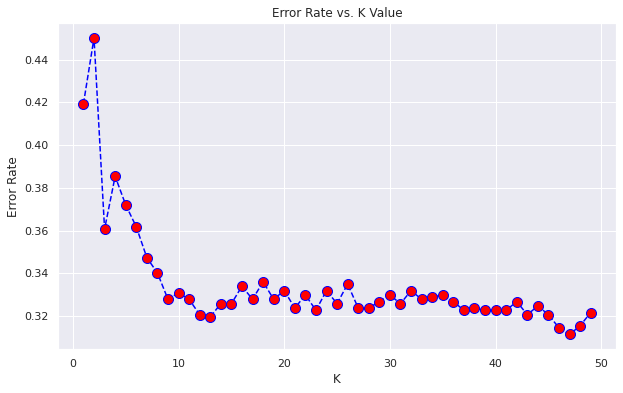

In [412]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [413]:
# NOW WITH K=8
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=8


[[275 108]
 [223 367]]


              precision    recall  f1-score   support

         0.0       0.55      0.72      0.62       383
         1.0       0.77      0.62      0.69       590

    accuracy                           0.66       973
   macro avg       0.66      0.67      0.66       973
weighted avg       0.69      0.66      0.66       973



In [414]:
# NOW WITH K=12
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=12


[[278 105]
 [207 383]]


              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       383
         1.0       0.78      0.65      0.71       590

    accuracy                           0.68       973
   macro avg       0.68      0.69      0.68       973
weighted avg       0.70      0.68      0.68       973



## DECISION TREE

In [415]:
# DT - FIT THE MODEL

from sklearn.tree import DecisionTreeClassifier

In [416]:
dtree = DecisionTreeClassifier()

In [417]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [418]:
# DT - PREDICTION

predictions = dtree.predict(X_test)

In [419]:
# DT - MODEL EVALUATION

from sklearn.metrics import classification_report, confusion_matrix

In [420]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62       383
         1.0       0.76      0.67      0.72       590

    accuracy                           0.68       973
   macro avg       0.67      0.68      0.67       973
weighted avg       0.69      0.68      0.68       973



In [421]:
print(confusion_matrix(y_test,predictions))

[[259 124]
 [192 398]]


## RANDOM FOREST

n_estimators = 200, 300, 400, 500

n_estimators = 300 yields highest accuracy

In [422]:
# RF - FIT THE MODEL

from sklearn.ensemble import RandomForestClassifier

In [423]:
rforest = RandomForestClassifier(n_estimators = 300)

In [424]:
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [425]:
# RF - PREDICTION

y_predict = rforest.predict(X_test)

In [426]:
print(confusion_matrix(y_test,predictions))

[[259 124]
 [192 398]]


In [427]:
# RF - MODEL EVALUATION

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62       383
         1.0       0.76      0.67      0.72       590

    accuracy                           0.68       973
   macro avg       0.67      0.68      0.67       973
weighted avg       0.69      0.68      0.68       973



## SVM

In [428]:
# SVM - FIT THE MODEL

from sklearn.svm import SVC

In [429]:
model = SVC()

In [430]:
model.fit(X_train, y_train)

SVC()

In [431]:
# SVM - PREDICTION

predictions = model.predict(X_test)

In [432]:
# SVM - MODEL EVALUATION

from sklearn.metrics import classification_report, confusion_matrix

In [433]:
print(confusion_matrix(y_test,predictions))

[[278 105]
 [213 377]]


In [434]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       383
         1.0       0.78      0.64      0.70       590

    accuracy                           0.67       973
   macro avg       0.67      0.68      0.67       973
weighted avg       0.70      0.67      0.68       973



In [274]:
# fine tune SVM
# GRIDSEARCH PRACTICE
from sklearn.model_selection import GridSearchCV


In [275]:
# create dictionary called param_grid and fill out some parameters for C and gamma
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.001,0.0001], 'kernel': ['rbf']}


In [276]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [277]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.660 total time=   0.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.666 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.578 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [278]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [279]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [280]:
grid_predictions = grid.predict(X_test)

In [281]:
print(confusion_matrix(y_test, grid_predictions))

[[287  96]
 [221 369]]


In [282]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.75      0.64       383
         1.0       0.79      0.63      0.70       590

    accuracy                           0.67       973
   macro avg       0.68      0.69      0.67       973
weighted avg       0.70      0.67      0.68       973



fine tuning the SVM model yields same result - 67% accuracy

#### all the models (logistic regression, KNN, decision tree, random forest, SVM) performed at about the same level of accuracy 67-68 percent. the results were fairly robust to finetuning and changes in parameters such as test size and k-value


ISSUES - 

(1) MISSING VARIABLES - only CG as explanatory variables for firm performance

(2) PERFORMANCE MEASURES - try a wider set - example - add some market driven ones - revenues, stock price etc

(2) ESG - data only for the G component of ESG - NO E or S - intersection of all three considered important for long-term performance and sustainable companies

(3) ALL G COMPONENTS GIVEN SAME WEIGHT - could try a weighted index of the CG features in developing the CG score - ex - give more weight ot board independence than poison pill

(4) TRY INDIVIDUAL CG ATTRIBUTES - to see if which ones weight more heavily on performance

(5) TRY INDIVIDUAL PERFORMANCE MEASURES as dependent variable - to see if individual performance measures yield different accuracies

(6) PERFORMANCE SCORE - try other variations - example - first quartile/quintile as exceptional performance

(7) using western standards of governace to explain performance of non-western firms - explore more unique features of the asian economies 

note -  could argue that as more international firms list on US/European exchanges, they will be forced to adopt western standards of governance



